## Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

### Attribute Information
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
    Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

## Objective: 
Predict type of glass

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Setting style parameters for graphs
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
#plt.rcParams['figure.facecolor']='#FFE5B4'

## Data Exploration

In [132]:
data=pd.read_csv("glass.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [133]:
data.shape

(214, 11)

This dataset contains 214 rows and 11 columns, out of which 1 is target variable ("type") and the remaining 10 are independent variables.

In [134]:
data=data.set_axis(["ID","RI","Na","Mg","Al","Si",
                    "K","Ca","Ba","Fe","Type of glass"],axis=1)

#data.set_index("ID")
data


,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [135]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


There are no missing values in the dataset.

In [136]:
# Description of dataset

data.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [137]:
# Checking the number of unique values in each column
data.nunique().to_frame("No. of unique values")

,No. of unique values
ID,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In fact, there are 6 types of glass. The data in K, Ba and Fe are the features where theres is more repetition of values.

In [138]:
# Check duplicates in DataFrame
print("Total Duplicate Rows are:",data.duplicated().sum())

Total Duplicate Rows are: 0


There are no duplicates.

In [139]:
# Drop ID column
data.drop("ID",axis=1, inplace=True)

In [140]:
# Classify window_class and non_window_class type of glass.
window_class,non_window_class=[x for _,x in data.groupby(data['Type of glass']>4)]

In [141]:
data['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [142]:
window_class['Type of glass'].value_counts()

2    76
1    70
3    17
Name: Type of glass, dtype: int64

In [143]:
non_window_class['Type of glass'].value_counts()

7    29
5    13
6     9
Name: Type of glass, dtype: int64

In [144]:
data["Classification"]=np.where(data["Type of glass"]<5,"window_class","non_window_class")

In [145]:
data.groupby(by=["Classification"]).count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Classification,,,,,,,,,,
non_window_class,51,51,51,51,51,51,51,51,51,51
window_class,163,163,163,163,163,163,163,163,163,163


In [146]:
data.groupby(by=["Type of glass"]).count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Classification
Type of glass,,,,,,,,,,
1,70,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29,29


In [104]:
data.groupby(["Classification","Type of glass"]).count()

RI  Na  Mg  Al  Si   K  Ca  Ba  Fe
Classification   Type of glass                                    
non_window_class 5              13  13  13  13  13  13  13  13  13
                 6               9   9   9   9   9   9   9   9   9
                 7              29  29  29  29  29  29  29  29  29
window_class     1              70  70  70  70  70  70  70  70  70
                 2              76  76  76  76  76  76  76  76  76
                 3              17  17  17  17  17  17  17  17  17

## Data Visualization

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


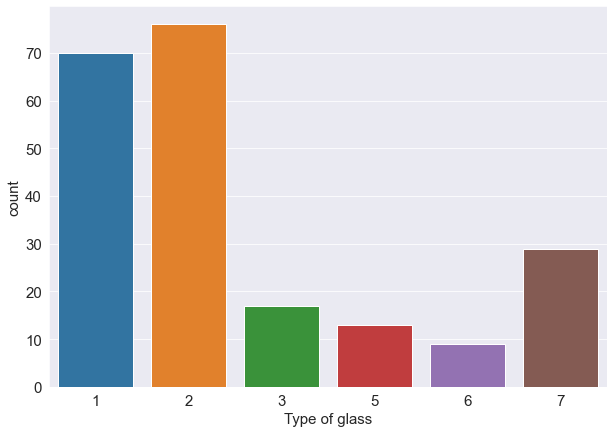

In [24]:
# Plotting the count corresponding to target variable values
print(data['Type of glass'].value_counts())
ax=sns.countplot(x="Type of glass",data=data)
plt.show()
#sns.catplot(x='quality',data=data,kind="count")

### Visualize the relation of each feature/input variables with the type of glass

In [25]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass',
       'Classification'],
      dtype='object')

window_class        163
non_window class     51
Name: Classification, dtype: int64


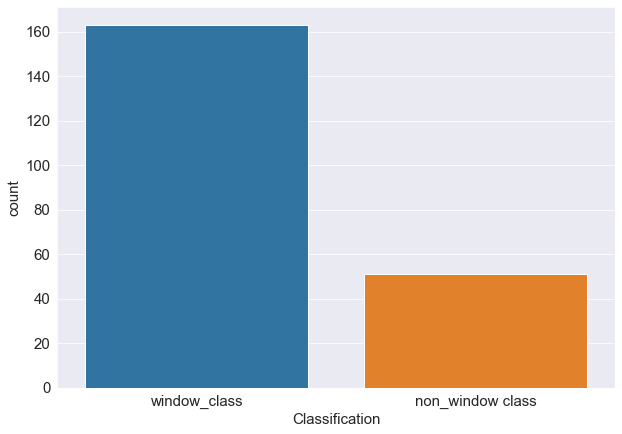

In [157]:
# Visualizing how many customers have StreamingMovies
print(data['Classification'].value_counts())
ax=sns.countplot(x="Classification",data=data)
plt.show()

array([<AxesSubplot:title={'center':'non_window class'}>,
       <AxesSubplot:title={'center':'window_class'}>], dtype=object)

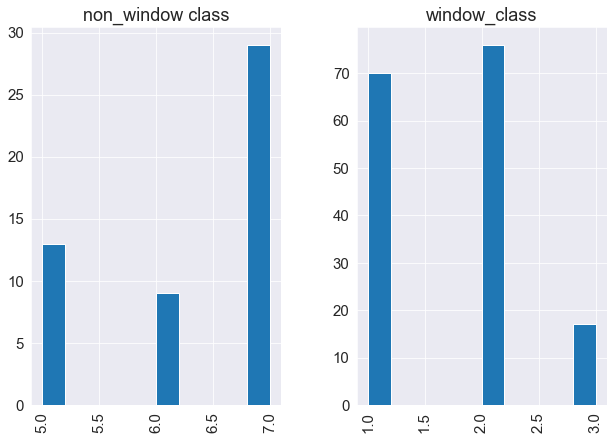

In [158]:
# Visualizing
data.hist("Type of glass",by="Classification")

<AxesSubplot:xlabel='Type of glass', ylabel='RI'>

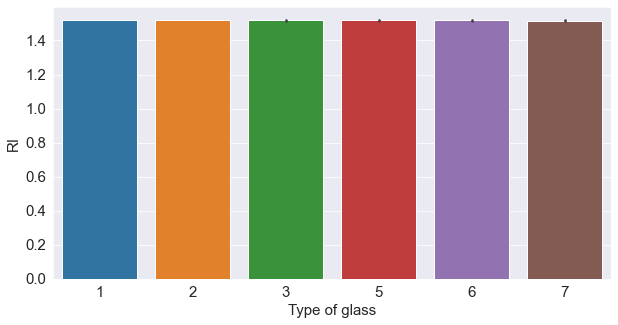

In [31]:
# RI Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='RI',data=data)

<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

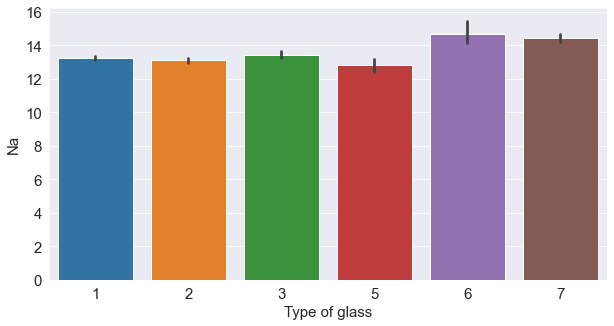

In [32]:
# Na Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='Na',data=data)

<AxesSubplot:xlabel='Type of glass', ylabel='Mg'>

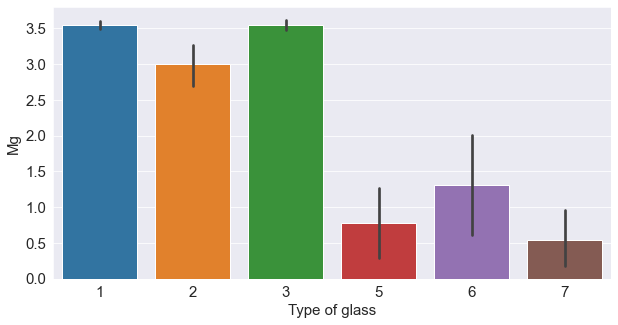

In [33]:
# Mg Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='Mg',data=data)

<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

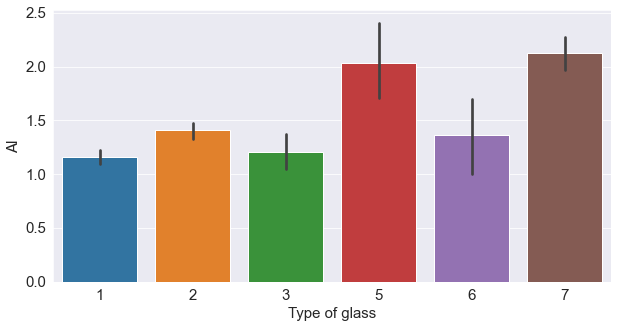

In [34]:
# Al Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='Al',data=data)

<AxesSubplot:xlabel='Type of glass', ylabel='Si'>

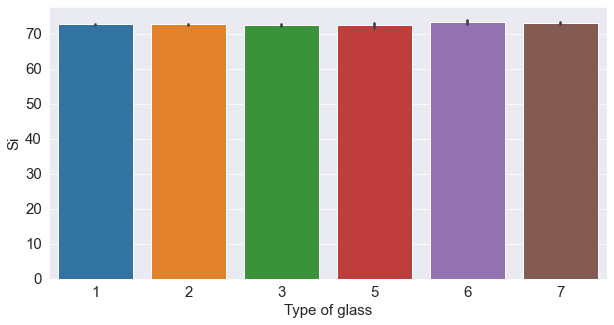

In [35]:
# Si Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='Si',data=data)

<AxesSubplot:xlabel='Type of glass', ylabel='K'>

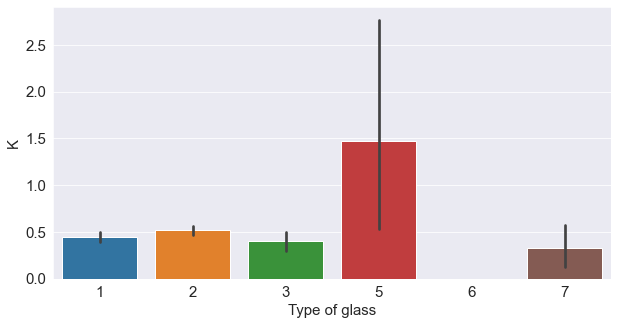

In [36]:
# K Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='K',data=data)

<AxesSubplot:xlabel='Type of glass', ylabel='Ca'>

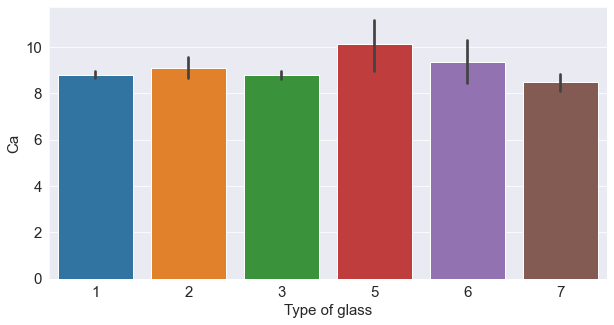

In [37]:
# Ca Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='Ca',data=data)

<AxesSubplot:xlabel='Type of glass', ylabel='Ba'>

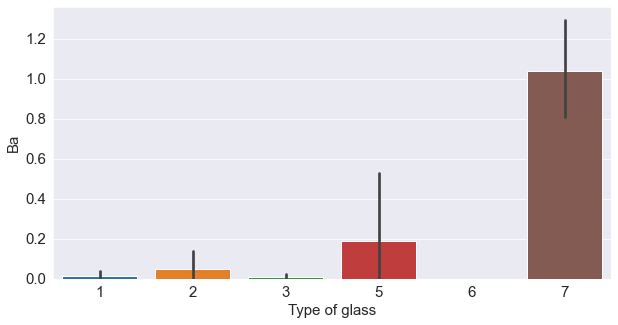

In [38]:
# Ba Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='Ba',data=data)

<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

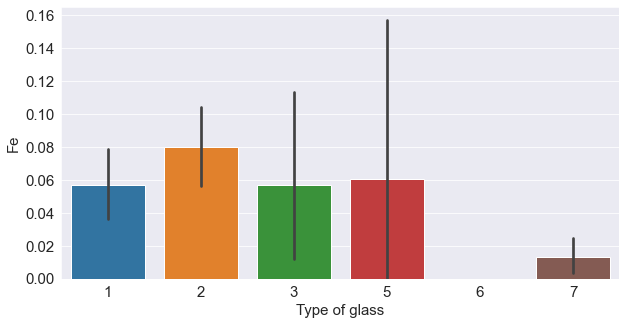

In [39]:
# Fe Vs Type of glass
plot=plt.figure(figsize=(10,5))
sns.barplot(x='Type of glass',y='Fe',data=data)

<AxesSubplot:>

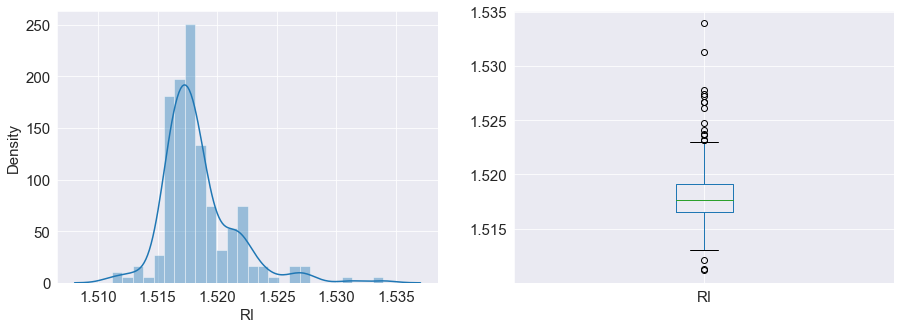

In [160]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['RI'])
plt.subplot(122)
data['RI'].plot.box(figsize=(15,5))

<AxesSubplot:>

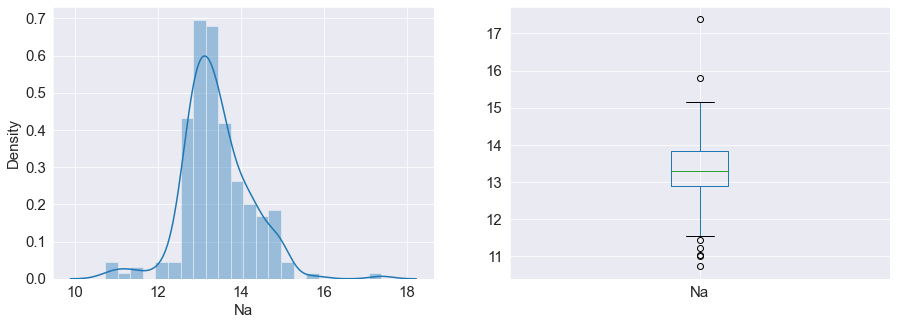

In [161]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['Na'])
plt.subplot(122)
data['Na'].plot.box(figsize=(15,5))

<AxesSubplot:>

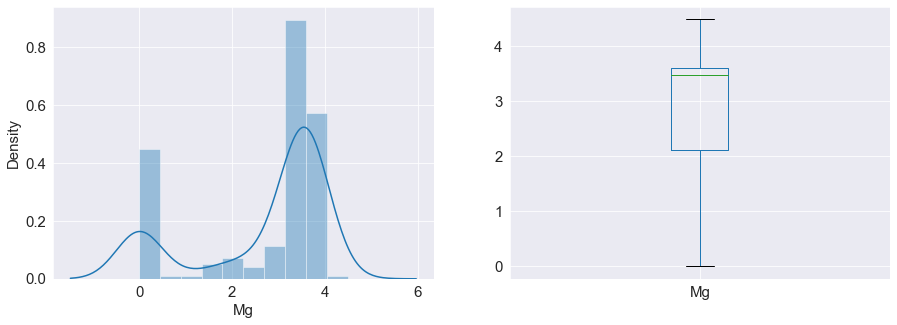

In [162]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['Mg'])
plt.subplot(122)
data['Mg'].plot.box(figsize=(15,5))

<AxesSubplot:>

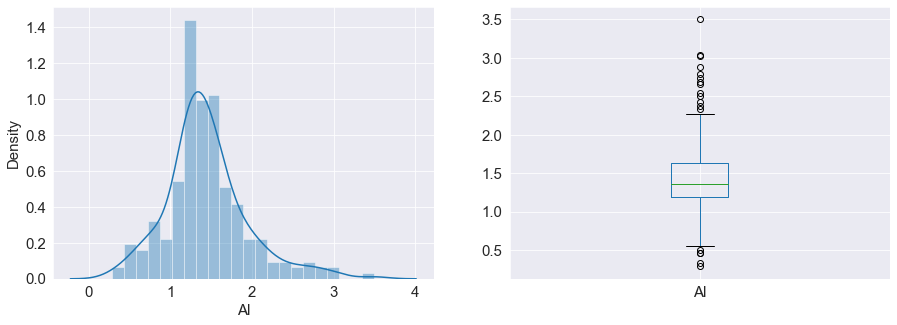

In [163]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['Al'])
plt.subplot(122)
data['Al'].plot.box(figsize=(15,5))

<AxesSubplot:>

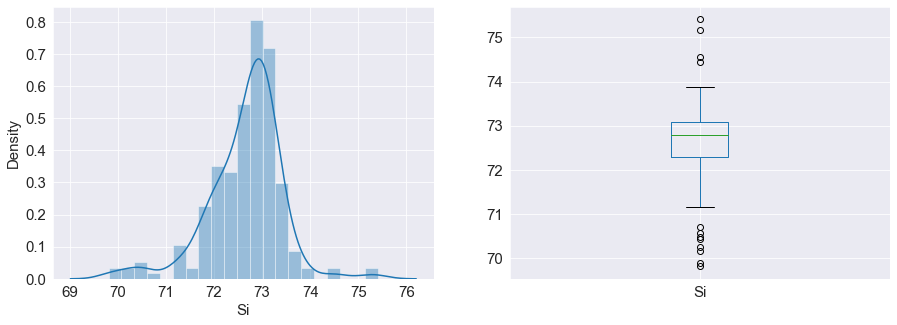

In [164]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['Si'])
plt.subplot(122)
data['Si'].plot.box(figsize=(15,5))

<AxesSubplot:>

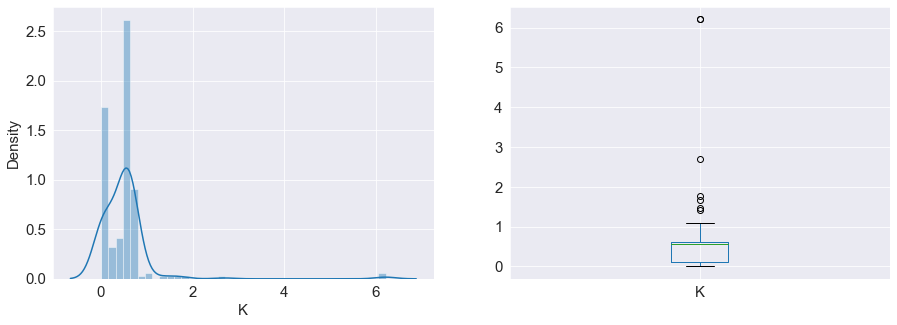

In [165]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['K'])
plt.subplot(122)
data['K'].plot.box(figsize=(15,5))

<AxesSubplot:>

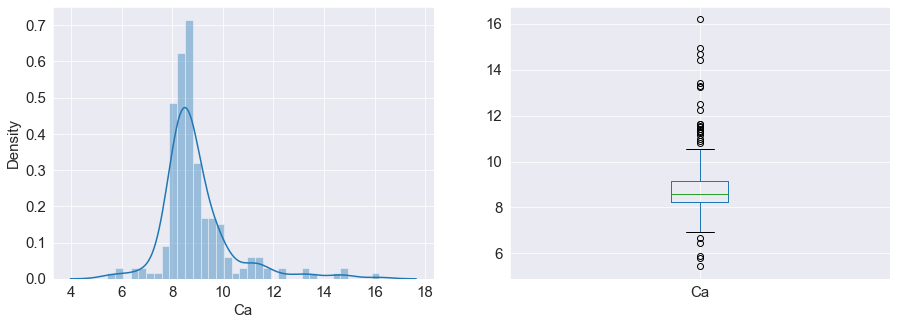

In [166]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['Ca'])
plt.subplot(122)
data['Ca'].plot.box(figsize=(15,5))

<AxesSubplot:>

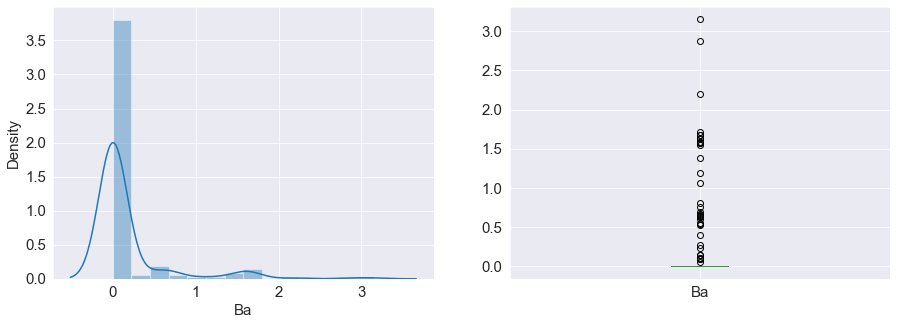

In [167]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['Ba'])
plt.subplot(122)
data['Ba'].plot.box(figsize=(15,5))

<AxesSubplot:>

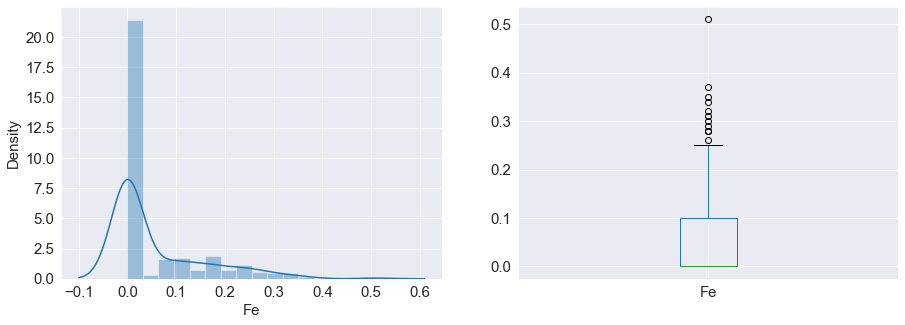

In [168]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['Fe'])
plt.subplot(122)
data['Fe'].plot.box(figsize=(15,5))

The graphs also show that there are outliers present in the dataset.

## Data Preprocessing

In [147]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass',
       'Classification'],
      dtype='object')

In [148]:
# Remove Outliers

from scipy.stats import zscore

out_features=data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
z=np.abs(zscore(out_features))
z

array([[0.87286765, 0.28495326, 1.25463857, ..., 0.14576634, 0.35287683,
        0.5864509 ],
       [0.24933347, 0.59181718, 0.63616803, ..., 0.79373376, 0.35287683,
        0.5864509 ],
       [0.72131806, 0.14993314, 0.60142249, ..., 0.82894938, 0.35287683,
        0.5864509 ],
       ...,
       [0.75404635, 1.16872135, 1.86551055, ..., 0.36410319, 2.95320036,
        0.5864509 ],
       [0.61239854, 1.19327046, 1.86551055, ..., 0.33593069, 2.81208731,
        0.5864509 ],
       [0.41436305, 1.00915211, 1.86551055, ..., 0.23732695, 3.01367739,
        0.5864509 ]])

In [149]:
# Threshold=3
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [150]:
data1=data[(z<3).all(axis=1)]
data1.shape

(194, 11)

In [151]:
# Shape of Old and New DataFrame
print("Old DataFrame - ",data.shape[0])
print("New DataFrame - ",data1.shape[0])

Old DataFrame -  214
New DataFrame -  194


In [152]:
print("Data Loss Percentage - ",((data.shape[0]-data1.shape[0])/data.shape[0]*100))

Data Loss Percentage -  9.345794392523365


In [153]:
# IQR Method

import operator

# 1st quantile
Q1=out_features.quantile(0.25)


# 3rd quantile
Q3=out_features.quantile(0.75)

# IQR
IQR=Q3-Q1
dataIQR=data[operator.invert(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1))]

In [154]:
dataIQR.shape

(136, 11)

In [155]:
print("Data Loss Percentage after removing outliers with IQR method - ",((data.shape[0]-dataIQR.shape[0])/data.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method -  36.44859813084112


I'll use the Z method to remove outliers, since the % loss is less.

### Correlation between the target variable and independent variables

In [156]:
# Find correlation between the data
correlation=data1.corr()
correlation

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,0.050760,0.048147,-0.522197,-0.609011,-0.368238,0.690650,-0.193013,-0.020046,-0.167355
Na,0.050760,1.000000,-0.487729,0.253127,-0.234718,-0.612183,0.019987,0.532000,-0.209838,0.533025
Mg,0.048147,-0.487729,1.000000,-0.593457,-0.377464,0.482622,-0.455582,-0.586581,0.134065,-0.810321
Al,-0.522197,0.253127,-0.593457,1.000000,0.335262,0.005827,-0.213304,0.532061,-0.117764,0.660262
Si,-0.609011,-0.234718,-0.377464,0.335262,1.000000,0.072579,-0.165712,0.155017,0.023279,0.262152
K,-0.368238,-0.612183,0.482622,0.005827,0.072579,1.000000,-0.500579,-0.253790,0.099394,-0.383499
Ca,0.690650,0.019987,-0.455582,-0.213304,-0.165712,-0.500579,1.000000,-0.167843,-0.011635,0.154762
Ba,-0.193013,0.532000,-0.586581,0.532061,0.155017,-0.253790,-0.167843,1.000000,-0.119955,0.682768
Fe,-0.020046,-0.209838,0.134065,-0.117764,0.023279,0.099394,-0.011635,-0.119955,1.000000,-0.202028
Type of glass,-0.167355,0.533025,-0.810321,0.660262,0.262152,-0.383499,0.154762,0.682768,-0.202028,1.000000


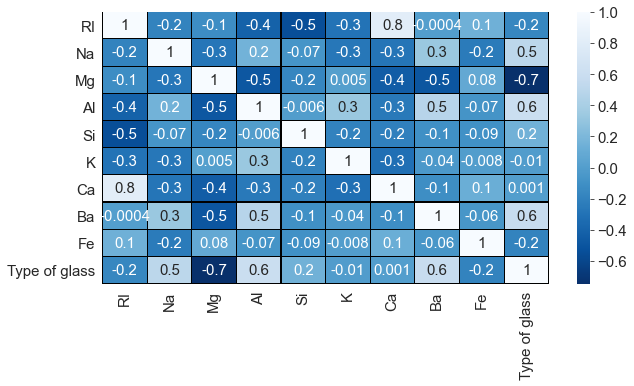

In [157]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

From the Heatmap plot we can see there is are features which are negatively correlated to each other.

In [158]:
data1.corr()['Type of glass'].sort_values()

Mg              -0.810321
K               -0.383499
Fe              -0.202028
RI              -0.167355
Ca               0.154762
Si               0.262152
Na               0.533025
Al               0.660262
Ba               0.682768
Type of glass    1.000000
Name: Type of glass, dtype: float64

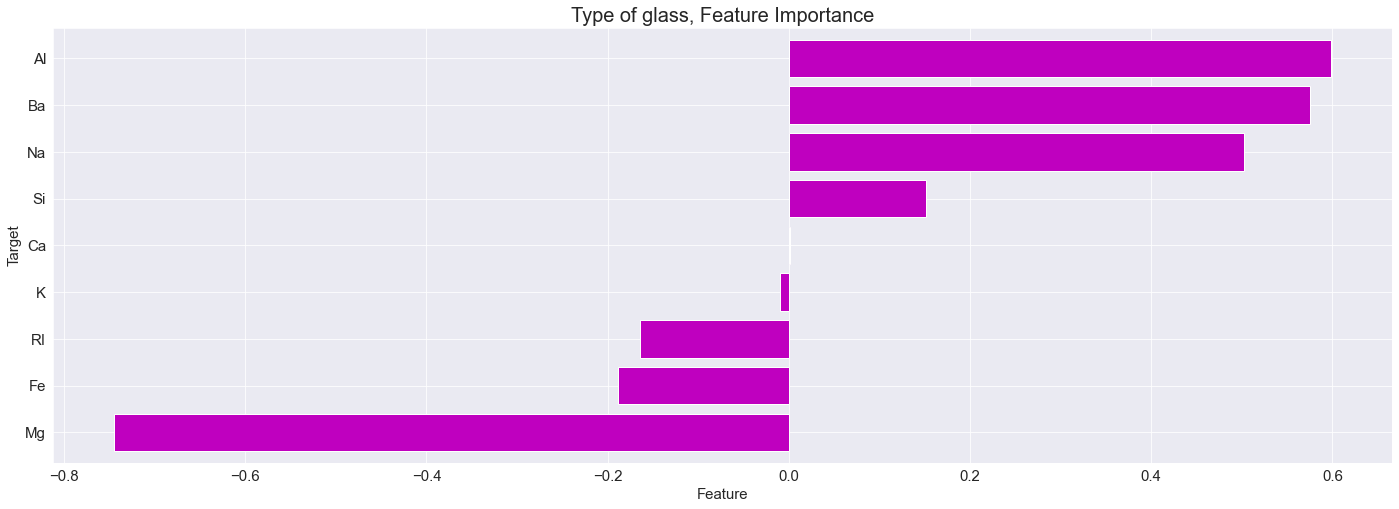

In [159]:
plt.figure(figsize=(24,8))
data.corr()['Type of glass'].sort_values().drop(['Type of glass']).plot(kind='barh',color='m',width=0.8)
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Type of glass, Feature Importance',fontsize=20)
plt.show()

In [160]:
# Checking for skewness
data1.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type of glass    1.284007
dtype: float64

In [161]:
# Removing skewness using cuberoot method
# We do not do this with categorical data.

data1['Ca']=np.cbrt(data1['Ca'])
data1['Fe']=np.cbrt(data1['Fe'])
data1['RI']=np.cbrt(data1['RI'])

I did not remove skewness when the correlation with target variable is good, like "Mg" and "Ba".

In [162]:
# Checking skewness again
data1.skew()

RI               0.948045
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               0.611914
Ba               3.188587
Fe               0.883166
Type of glass    1.284007
dtype: float64

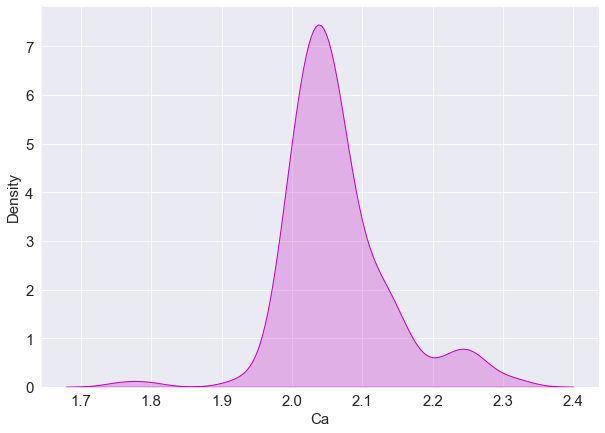

In [126]:
# let's visualize how the data has been distributed in Volume after removing skewness
sns.distplot(data1['Ca'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

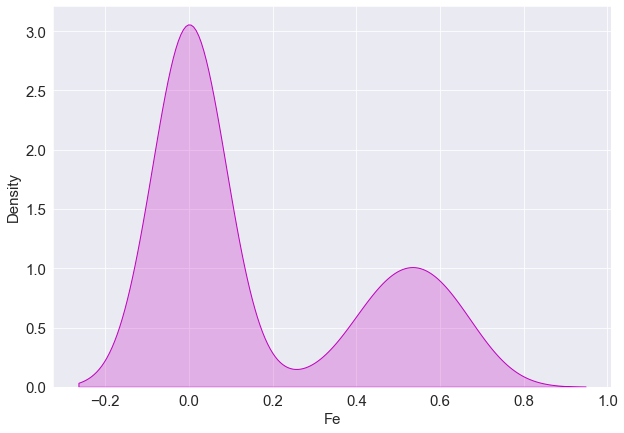

In [127]:
# let's visualize how the data has been distributed in Volume after removing skewness
sns.distplot(data1['Fe'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

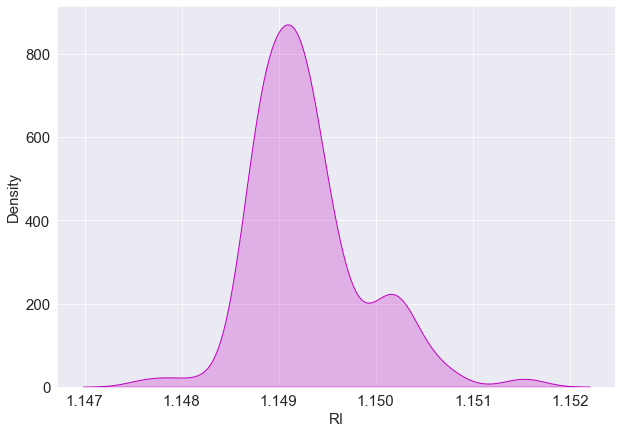

In [163]:
# let's visualize how the data has been distributed in Volume after removing skewness
sns.distplot(data1['RI'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

### Label Binarization

In [164]:
data1.drop("Classification",axis=1,inplace=True)

In [166]:
#data1

In [167]:
# Separating the independent and target variables into x and y
# Label Binarization

x=data1.drop("Type of glass",axis=1)
y=data1["Type of glass"]

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (194, 9)
Label Dimension (194,)


### Feature Scaling using Standard Scalarization

In [168]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.292056,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.041137,-0.346292,-0.67803
1,-0.197444,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.038165,-0.346292,-0.67803
2,-0.824575,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.094542,-0.346292,-0.67803
3,-0.175524,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.606457,-0.346292,-0.67803
4,-0.280746,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.770849,-0.346292,-0.67803
...,...,...,...,...,...,...,...,...,...
189,-0.728068,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.671549,1.169695,-0.67803
190,-0.802641,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.400966,2.629534,-0.67803
191,-0.530695,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.411806,4.117447,-0.67803
192,1.134449,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.368929,4.257816,-0.67803


### Checking Variance Inflation Factor

In [169]:
# Checking Variance Inflation Factor

# Finding the Variance Inflation Factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif["VIF values"]=[variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,5.463025,RI
1,35.814906,Na
2,123.020827,Mg
3,15.344656,Al
4,25.679512,Si
5,12.553810,K
6,81.003631,Ca
7,11.768608,Ba
8,1.039447,Fe


Mg has a high VIF; however, I will not drop this column because it corresponds to one highly correlated chemical properties of glass.

In [170]:
# Checking if the data is balanced
# Checking the value count of target column
y.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type of glass, dtype: int64

The data is not balanced. Given that it is a classification problem, I will balance the data using Oversampling Method.

### Oversampling the data

In [171]:
# Oversampling the data

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [172]:
# Checking the value count of target column y1
y1.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: Type of glass, dtype: int64

## Modelling

In [173]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "at random_state",maxRS)

Best accuracy is  0.9761904761904762 at random_state 146


### Creating train test split

In [177]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

### Classification Algorithms

In [178]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [179]:
# Checking the accuracy for RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
acc_RFC=accuracy_score(y_test,predRFC)
print(acc_RFC)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9682539682539683
[[15  0  2  0  0  0]
 [ 0 16  1  0  1  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       1.00      0.89      0.94        18
           3       0.87      1.00      0.93        20
           5       1.00      1.00      1.00        25
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        24

    accuracy                           0.97       126
   macro avg       0.97      0.96      0.96       126
weighted avg       0.97      0.97      0.97       126



In [180]:
# Checking the accuracy for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
acc_LR=accuracy_score(y_test,predLR)
print(acc_LR)
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8650793650793651
[[13  2  2  0  0  0]
 [ 3 10  4  0  1  0]
 [ 4  1 15  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.65      0.76      0.70        17
           2       0.77      0.56      0.65        18
           3       0.71      0.75      0.73        20
           5       1.00      1.00      1.00        25
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        24

    accuracy                           0.87       126
   macro avg       0.85      0.85      0.84       126
weighted avg       0.87      0.87      0.86       126



In [181]:
# Checking the accuracy for Support Vector Machine Classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
acc_SVC=accuracy_score(y_test,predsvc)
print(acc_SVC)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8650793650793651
[[15  1  1  0  0  0]
 [ 6  8  3  0  1  0]
 [ 4  1 15  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.60      0.88      0.71        17
           2       0.80      0.44      0.57        18
           3       0.79      0.75      0.77        20
           5       1.00      1.00      1.00        25
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        24

    accuracy                           0.87       126
   macro avg       0.86      0.85      0.84       126
weighted avg       0.88      0.87      0.86       126



In [182]:
# Checking the accuracy for Gradient Boosting Classifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
acc_GB=accuracy_score(y_test,predGB)
print(acc_GB)
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9206349206349206
[[13  1  2  1  0  0]
 [ 1 14  2  0  1  0]
 [ 1  0 19  0  0  0]
 [ 0  1  0 24  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.88      0.78      0.82        18
           3       0.83      0.95      0.88        20
           5       0.96      0.96      0.96        25
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        24

    accuracy                           0.92       126
   macro avg       0.91      0.91      0.91       126
weighted avg       0.92      0.92      0.92       126



In [183]:
# Checking the accuracy for AdaBoost Classifier

ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
acc_ABC=accuracy_score(y_test,predABC)
print(acc_ABC)
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.6904761904761905
[[ 0 17  0  0  0  0]
 [ 0 17  0  0  1  0]
 [ 0 20  0  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 22  0]
 [ 0  1  0  0  0 23]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.31      0.94      0.47        18
           3       0.00      0.00      0.00        20
           5       1.00      1.00      1.00        25
           6       0.96      1.00      0.98        22
           7       1.00      0.96      0.98        24

    accuracy                           0.69       126
   macro avg       0.54      0.65      0.57       126
weighted avg       0.60      0.69      0.62       126



In [184]:
# Checking the accuracy for Bagging Classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
acc_BC=accuracy_score(y_test,predBC)
print(acc_BC)
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9444444444444444
[[15  1  1  0  0  0]
 [ 2 13  2  0  1  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        17
           2       0.93      0.72      0.81        18
           3       0.87      1.00      0.93        20
           5       1.00      1.00      1.00        25
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        24

    accuracy                           0.94       126
   macro avg       0.94      0.93      0.93       126
weighted avg       0.95      0.94      0.94       126



In [185]:
# Checking the accuracy for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
acc_ET=accuracy_score(y_test,predET)
print(acc_ET)
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9523809523809523
[[16  0  1  0  0  0]
 [ 3 13  1  0  1  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.84      0.94      0.89        17
           2       1.00      0.72      0.84        18
           3       0.91      1.00      0.95        20
           5       1.00      1.00      1.00        25
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        24

    accuracy                           0.95       126
   macro avg       0.95      0.94      0.94       126
weighted avg       0.96      0.95      0.95       126



In [186]:
# Checking all algorithm results

results_alg=pd.DataFrame({'Model':['RandomForestClassifier','Logistic Regression', 'Support Vector Machine Classifier(SVC)', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'ExtraTreesClassifier'],'Accuracy':[acc_RFC,acc_LR,acc_SVC,acc_GB,acc_ABC,acc_BC,acc_ET]})
results_alg.index+=1
results_alg

,Model,Accuracy
1,RandomForestClassifier,0.968254
2,Logistic Regression,0.865079
3,Support Vector Machine Classifier(SVC),0.865079
4,Gradient Boosting Classifier,0.920635
5,AdaBoost Classifier,0.690476
6,Bagging Classifier,0.944444
7,ExtraTreesClassifier,0.952381


RandomForestClassifier (RFC) has the highest accuracy score.

### Cross Validation Score

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
diff_RFC=accuracy_score(y_test,predRFC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_RFC)

[0.69230769 0.74358974 0.74358974 0.61538462 0.81578947]
0.7221322537112012
Difference between Accuracy Score and Cross Validation Score is 0.2461217145427671


In [189]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
diff_LR=accuracy_score(y_test,predLR)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_LR)

[0.56410256 0.71794872 0.69230769 0.53846154 0.71052632]
0.6446693657219973
Difference between Accuracy Score and Cross Validation Score is 0.22040999935736783


In [190]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
diff_GB=accuracy_score(y_test,predGB)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_GB)

[0.71794872 0.71794872 0.74358974 0.58974359 0.71052632]
0.6959514170040487
Difference between Accuracy Score and Cross Validation Score is 0.22468350363087186


In [191]:
# Checking cv score for Support Vector Machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
diff_SVC=accuracy_score(y_test,predsvc)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_SVC)

[0.61538462 0.76923077 0.64102564 0.64102564 0.68421053]
0.6701754385964912
Difference between Accuracy Score and Cross Validation Score is 0.1949039264828739


In [192]:
# Checking cv score for AdaBoosting Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
diff_ABC=accuracy_score(y_test,predABC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_ABC)

[0.43589744 0.48717949 0.53846154 0.53846154 0.42105263]
0.4842105263157895
Difference between Accuracy Score and Cross Validation Score is 0.20626566416040099


In [193]:
# Checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
diff_BC=accuracy_score(y_test,predBC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_BC)

[0.69230769 0.71794872 0.69230769 0.48717949 0.60526316]
0.6390013495276652
Difference between Accuracy Score and Cross Validation Score is 0.30544309491677923


In [194]:
# Checking cv score for ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
diff_ET=accuracy_score(y_test,predET)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_ET)

[0.69230769 0.69230769 0.79487179 0.64102564 0.78947368]
0.7219973009446694
Difference between Accuracy Score and Cross Validation Score is 0.23038365143628292


In [195]:
# Checking for the least difference between Accuracy Score and Cross Validation Score per algorithm

diff=pd.DataFrame({'Model':['RandomForestClassifier','Logistic Regression', 'Support Vector Machine Classifier(SVC)', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'ExtraTreesClassifier'],'Difference':[diff_RFC,diff_LR,diff_SVC,diff_GB,diff_ABC,diff_BC,diff_ET]})
diff.index+=1
diff

,Model,Difference
1,RandomForestClassifier,0.246122
2,Logistic Regression,0.220410
3,Support Vector Machine Classifier(SVC),0.194904
4,Gradient Boosting Classifier,0.224684
5,AdaBoost Classifier,0.206266
6,Bagging Classifier,0.305443
7,ExtraTreesClassifier,0.230384


Support Vector Machine Classifier(SVC) is our best model as the difference between Accuracy Score and Cross Validation is least.

## Hyperparameter Tuning

In [196]:
# To increase the performance of the model
# Support Vector Machine Classifier

from sklearn.model_selection import GridSearchCV

parameters={'C':[0.1,1,100,1000],
           'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
           'degree':[1,2,3,4,5,6],
           'gamma':['scale', 'auto'],
           'decision_function_shape':['ovo', 'ovr']}

In [197]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [198]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [199]:
GCV.best_params_

{'C': 100,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [200]:
# Final Model

Final_model=SVC(C=100,decision_function_shape='ovo',degree=1,gamma='scale',kernel='rbf')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.26984126984127


### Saving the model

In [202]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Glass Identification_Analysis.pkl")

['Glass Identification_Analysis.pkl']

### Predicting the saved model

In [203]:
# Let's load the saved model and get the predictions

model=joblib.load("Glass Identification_Analysis.pkl")

# Prediction
prediction=model.predict(x_test)
prediction

array([5, 7, 2, 7, 3, 7, 6, 7, 2, 6, 6, 3, 7, 3, 6, 5, 1, 5, 5, 7, 7, 5,
       5, 5, 7, 1, 1, 3, 6, 2, 2, 7, 5, 1, 1, 6, 1, 7, 2, 7, 7, 5, 5, 2,
       3, 6, 6, 6, 1, 5, 2, 3, 5, 6, 5, 3, 7, 5, 3, 2, 5, 7, 7, 6, 2, 5,
       7, 5, 3, 2, 6, 3, 5, 1, 7, 7, 7, 3, 6, 2, 5, 6, 6, 1, 6, 3, 3, 2,
       3, 6, 5, 2, 6, 7, 3, 1, 2, 6, 3, 5, 7, 7, 3, 7, 3, 1, 6, 3, 3, 2,
       1, 7, 1, 2, 6, 5, 3, 5, 5, 3, 1, 5, 2, 6, 6, 1], dtype=int64)

Here we can see the predicted types of glass.

In [204]:
# Checking if the model is giving the correct prediction

a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,5,5
1,7,7
2,2,2
3,7,7
4,3,2
...,...,...
121,5,5
122,2,2
123,6,6
124,6,6


The model is giving good predictions, when comparing to original values.